<a href="https://colab.research.google.com/github/saga743k/Deep-Learning-Experiments/blob/main/Ex_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 372s 213ms/step - accuracy: 0.2287 - loss: 2.0668 - val_accuracy: 0.1000 - val_loss: 2.3483
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 387s 216ms/step - accuracy: 0.4275 - loss: 1.5657 - val_accuracy: 0.1000 - val_loss: 2.3435
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 342s 219ms/step - accuracy: 0.5067 - loss: 1.3672 - val_accuracy: 0.2802 - val_loss: 2.0131
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 388s 223ms/step - accuracy: 0.5613 - loss: 1.2385 - val_accuracy: 0.5299 - val_loss: 1.9041
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 377s 220ms/step - accuracy: 0.6023 - loss: 1.1331 - val_accuracy: 0.5024 - val_loss: 3.6020


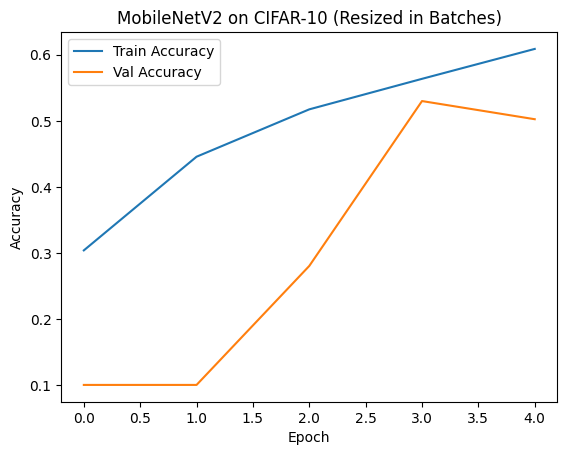

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 2: ImageDataGenerator with resizing and normalization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Resize images on-the-fly to 224x224
train_gen = train_datagen.flow(
    x_train, y_train_cat,
    batch_size=32,
    shuffle=True
)

test_gen = test_datagen.flow(
    x_test, y_test_cat,
    batch_size=32,
    shuffle=False
)

# Step 3: Define the model using MobileNetV2
base_model = MobileNetV2(include_top=False, input_shape=(32, 32, 3), weights=None)  # Using untrained weights (CIFAR-10 is small)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

# Step 4: Compile and train
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, validation_data=test_gen, epochs=5)

# Step 5: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('MobileNetV2 on CIFAR-10 (Resized in Batches)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()